<a href="https://colab.research.google.com/github/Ang-Li-code/MAT422/blob/main/HW_2_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Concepts in Statistics and Probability, Part 3

The following code will demonstrate principles found in the topics of Maximum Likelihood Estimation for Random Samples, as well as Linear Regression

## Maximum Likelihood Estimation

Maximum Likelihood Estimation (MLE) is used to estimate the parameters of a probability distribution or model by finding the parameter values that make the observed data most probable.

The following code will generate a normal distribution with a specified mean and standard deviation, then proceed to show how MLE can be used to find said mean and standard deviation using only a small set of data from the distribution.

The formulas used in the code are derived MLE's for mean and standard deviation of a given sample, with rough steps shown below:

$f(x_1,...,x_n: \mu, \sigma^2) = (\frac{1}{\sqrt{2\pi\sigma^2}})^\frac{n}{2}e^{-∑{\frac{(x_i-\mu)^2}{2σ^2}}}$

So

$ln[f(x_1,...,x_n: \mu, \sigma^2)] = -\frac{n}{2}ln(2πσ^2) - \frac{1}{2σ^2}∑(x_i - μ)^2$

Thus

$\frac{\partial ln[f(x_1,...,x_n: \mu, \sigma^2)]}{\partial μ} = -\frac{1}{σ^2}∑(x_i - μ)$

and

$\frac{\partial ln[f(x_1,...,x_n: \mu, \sigma^2)]}{\partial σ^2} = -\frac{n}{2σ^2} + \frac{1}{2σ^4}∑(x_i-μ)^2$

By setting both partial derivatives to zero and solving for $μ$ and $σ^2$, respectively, we get

$\hat{μ} = \frac{1}{n}∑x_i = \bar{X}$

and

$\hat{σ^2} = \frac{∑(x_i - μ)^2}{n} = \frac{∑(X_i - \bar{X})^2}{n}$

True Mean: 5, Estimated Mean (MLE): 5.0386641116446516
True Std: 2, Estimated Std (MLE): 1.9574524154947086


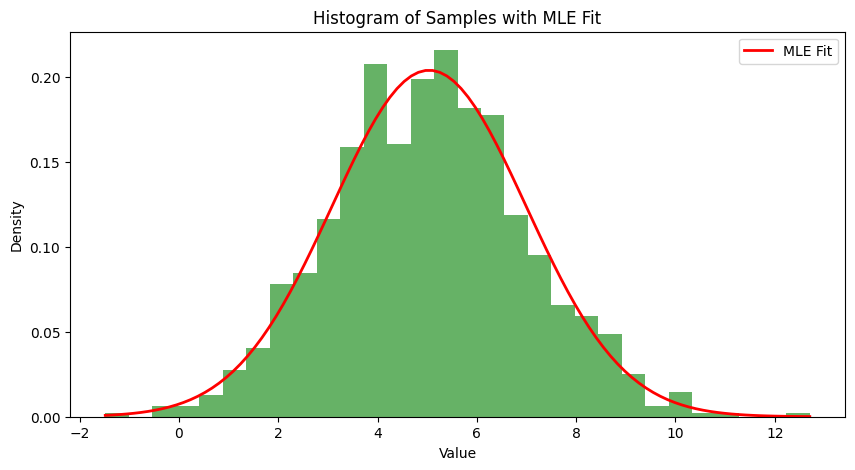

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

# Set a random seed for reproducibility
np.random.seed(42)

# Generate random samples from a normal distribution
true_mean = 5
true_std = 2
samples = np.random.normal(true_mean, true_std, size=1000)

# MLE for mean (mu)
mle_mean = np.mean(samples)

# MLE for standard deviation (sigma)
mle_std = np.sqrt(np.mean((samples - mle_mean) ** 2))

print(f"True Mean: {true_mean}, Estimated Mean (MLE): {mle_mean}")
print(f"True Std: {true_std}, Estimated Std (MLE): {mle_std}")

# Plot the results for MLE
plt.figure(figsize=(10, 5))
plt.hist(samples, bins=30, density=True, alpha=0.6, color='g')

# Plot the estimated normal distribution
x = np.linspace(min(samples), max(samples), 100)
pdf = (1 / (mle_std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mle_mean) / mle_std) ** 2)
plt.plot(x, pdf, 'r-', lw=2, label='MLE Fit')
plt.title('Histogram of Samples with MLE Fit')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()


## Linear Regression

Although linear regression can already be performed through principles in linear algebra (i.e. the least squares problem), it is also possible to approach the problem through the lense of probability.

The code below will generate a random number of samples, and perform linear regression both via the least squares method using linear algebra, as well as the MLA method in probability, then compare the results of both methods.

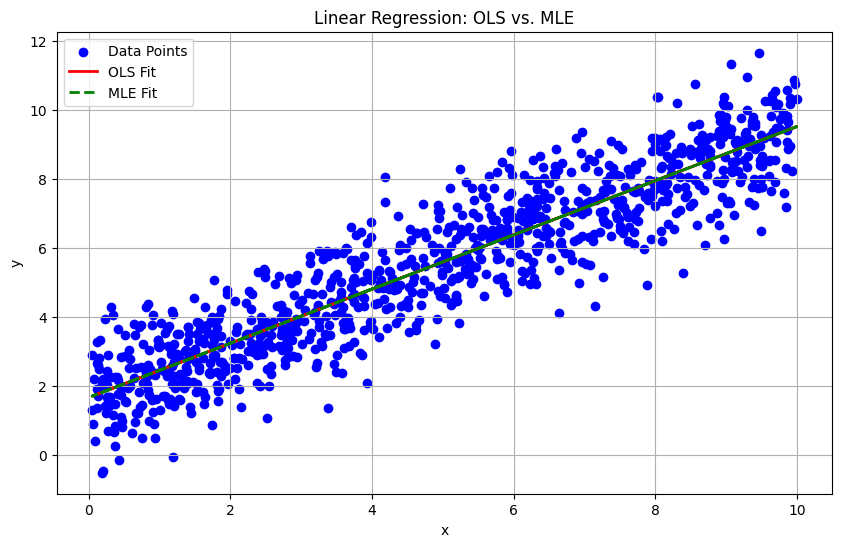

OLS Estimates: β₀ = 1.67, β₁ = 0.78
MLE Estimates: β₀ = 1.67, β₁ = 0.78


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Generate random data
np.random.seed(42)  # For reproducibility

# Number of samples
n = 1000

# Generate random x values
x = np.random.uniform(0, 10, n)

# Generate y values with some noise
true_beta_0 = 1.5
true_beta_1 = 0.8
noise = np.random.normal(0, 1, n)  # Normal noise
y = true_beta_0 + true_beta_1 * x + noise

# Create a DataFrame
df = pd.DataFrame({'x': x, 'y': y})

# Prepare the design matrix X
# Add a column of ones for the intercept
X = np.c_[np.ones(n), df['x']]  # shape (n, 2)
y = df['y'].values  # shape (n,)

# Step 3: Calculate the OLS estimates using linear algebra
# Least Squares formula: beta = (X^T * X)^(-1) * X^T * y
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

# Extract coefficients
beta_0, beta_1 = beta_hat

# Step 3: MLE Estimation
# Define the negative log-likelihood function
def negative_log_likelihood(params):
    beta_0, beta_1 = params
    residuals = df['y'] - (beta_0 + beta_1 * df['x'])
    return np.sum(residuals**2)

# Initial guess for beta_0 and beta_1
initial_guess = [0, 0]

# Minimize the negative log-likelihood function
result = minimize(negative_log_likelihood, initial_guess)

# MLE estimates
beta_0_mle, beta_1_mle = result.x

# Step 4: Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(df['x'], df['y'], color='blue', label='Data Points')
plt.plot(df['x'], beta_0 + beta_1 * df['x'], color='red', label='OLS Fit', linewidth=2)
plt.plot(df['x'], beta_0_mle + beta_1_mle * df['x'], color='green', label='MLE Fit', linestyle='--', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression: OLS vs. MLE')
plt.legend()
plt.grid()
plt.show()

# Output results
print(f"OLS Estimates: β₀ = {beta_0:.2f}, β₁ = {beta_1:.2f}")
print(f"MLE Estimates: β₀ = {beta_0_mle:.2f}, β₁ = {beta_1_mle:.2f}")
